In [1]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data      

tf.set_random_seed(0)                                           

# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [37]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, 28,28, 1]) #the first dimension (None) will index the images
Y_ = tf.placeholder(tf.float32, [None, 10])


batch = tf.Variable(0)
lr= tf.train.exponential_decay(
  0.1,             
  batch ,  
  1000,        
  0.85,                
  staircase=True)

XX = tf.reshape(X, [-1,784])

x_image = tf.reshape(XX, [-1,28,28,1])

#define weight variable for a convolutional layer
#Conv layer 1
W_1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[4]))    
Y_1 = tf.nn.relu(tf.nn.conv2d(x_image, W_1, strides=[1,1,1,1], padding='SAME') + b_conv1)

#Conv layer 2
W_2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[8]))    
Y_2 = tf.nn.relu(tf.nn.conv2d( Y_1 , W_2, strides=[1,2,2,1], padding='SAME') + b_conv2)

#Conv layer 3
W_3 = tf.Variable(tf.truncated_normal([5, 5, 8, 12], stddev=0.1))
b_conv3 = tf.Variable(tf.constant(0.1, shape=[12]))    
Y_3 = tf.nn.relu(tf.nn.conv2d( Y_2 , W_3, strides=[1,2,2,1], padding='SAME') + b_conv3)

Y_3_flat = tf.reshape(Y_3, [-1, 7*7*12])

#Densely connected layer
W_dense = tf.Variable(tf.truncated_normal([7*7*12, 200], stddev=0.1)) 
B_dense= tf.Variable(tf.constant(0.1, shape=[200]))
relu_dense_scores = tf.nn.relu(tf.matmul(Y_3_flat, W_dense) + B_dense)


pkeep = tf.placeholder(tf.float32)
relu_dense_scores_drop = tf.nn.dropout(relu_dense_scores, pkeep)


#Readout layer
W_sm = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1)) 
b_sm = tf.Variable(tf.zeros([10]))

Ylogits = tf.matmul(relu_dense_scores_drop, W_sm) + b_sm
Y = tf.nn.softmax(Ylogits)

# 3. Define the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Ylogits, Y_) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)


correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# 5. Define an optimizer
# with GD and learning rate 0.5 the accuracy is 0.12
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy , global_step=batch )
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy, global_step=batch)

0 0.1104
100 0.9447
200 0.963
300 0.9549
400 0.9747
500 0.976
600 0.9725
700 0.9799
800 0.9784
900 0.9808
1000 0.979
1100 0.983
1200 0.9819
1300 0.9824
1400 0.9845
1500 0.9821
1600 0.9821
1700 0.9868
1800 0.9854
1900 0.9824
2000 0.9854
2100 0.9825
2200 0.9839
2300 0.9848
2400 0.9845
2500 0.9855
2600 0.9854
2700 0.9858
2800 0.9874
2900 0.9856
3000 0.985
3100 0.9867
3200 0.9855
3300 0.986
3400 0.9853
3500 0.9853
3600 0.9848
3700 0.9799
3800 0.9849
3900 0.9828
4000 0.986
4100 0.9854
4200 0.9858
4300 0.9803
4400 0.9859
4500 0.9851
4600 0.9854
4700 0.9855
4800 0.9862
4900 0.9845
5000 0.9849
5100 0.9843
5200 0.9866
5300 0.9817
5400 0.9843
5500 0.9817
5600 0.9861
5700 0.9846
5800 0.9869
5900 0.9873
6000 0.9866
6100 0.9882
6200 0.9884
6300 0.9854
6400 0.9857
6500 0.9859
6600 0.9852
6700 0.987
6800 0.9862
6900 0.9867
7000 0.9873
7100 0.9833
7200 0.9854
7300 0.987
7400 0.9885
7500 0.9848
7600 0.9868
7700 0.9883
7800 0.9843
7900 0.9864
8000 0.9819
8100 0.9885
8200 0.9849
8300 0.987
8400 0.9866
85

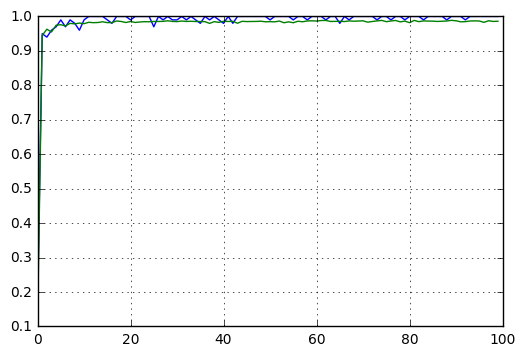

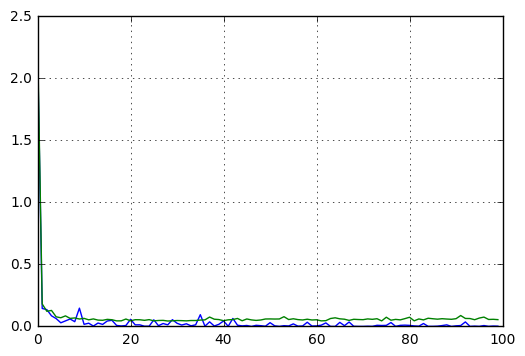

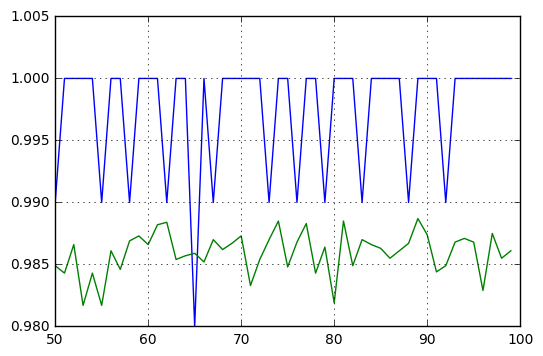

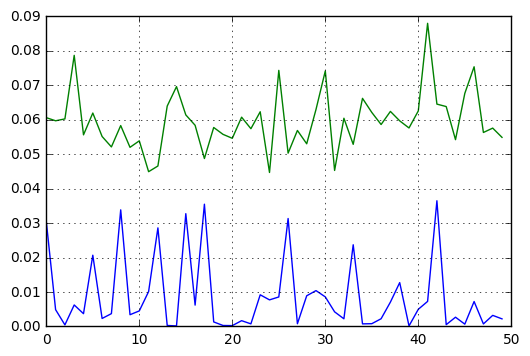

In [38]:

# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y , pkeep: 0.75})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y , pkeep: 1.0})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels , pkeep: 1.0 })
        test_a.append(a)
        print(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc
    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()